# Campaign Finance and Election Outcomes

## Problem Description
I will train a decision tree classifier to predict United States congressional election campaign outcomes given aggregated financial and organizational data from their campaigns.  I will then evaluate the constituent weights of the decision tree classifier to determine which features were most relevant to predicting campaign outcomes.

## Solution Method
The financial data for each campaign will be confined to the data made available by the Federal Election Commission.  Consequently, this dataset will not include information on independent spending from expenditure-only committees, or "super PACs", since these political action committees are disassociated from the compaigns they support by definition.

Furthermore, data pertaining to congressional membership has been sourced from ProPublica, an "independent, nonprofit newsroom" with extensive data on current and historical Congress members.  This data was used to determine if a candidate was victorious in an election.

There were notable imperfections in both the openFEC API and the ProPublica API that will likely have a material impact on the results.  These discrepancies will be discussed later in the notebook.

## Input

In [12]:
'''
Jupyter isn't automatically configured to start from the project directory.  This "root"
path will be different for each user.
'''
import os
project_root = os.path.join(os.path.curdir, '..')

import pandas as pd
senate_X = pd.read_json(f'{project_root}/data/processed/senate_features.json', orient='records')
senate_propublica_y = pd.read_json(f'{project_root}/data/processed/senate_target_propublica.json', orient='records')
senate_fec_y = pd.read_json(f'{project_root}/data/processed/senate_target_fec.json', orient='records')

house_X = pd.read_json(f'{project_root}/data/processed/house_features.json', orient='records')
house_propublica_y = pd.read_json(f'{project_root}/data/processed/house_target_propublica.json', orient='records')
house_fec_y = pd.read_json(f'{project_root}/data/processed/house_target_fec.json', orient='records')

combined_X = pd.read_json(f'{project_root}/data/processed/combined_features.json', orient='records')
combined_propublica_y = pd.read_json(f'{project_root}/data/processed/combined_target_propublica.json', orient='records')
combined_fec_y = pd.read_json(f'{project_root}/data/processed/combined_target_fec.json', orient='records')

## Analysis

In [13]:
from sklearn import model_selection
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydot

def get_dot_data(clf, feature_names=None, class_names=True):
    ''' Get the dot graph for a given decision tree classifier
    '''
    export_graphviz_kwargs = {
        'out_file': None,
        'feature_names': feature_names,
        'class_names': class_names,
        'filled': True,
        'special_characters': True
    }

    # Generate and save a dot file with the decision tree
    return tree.export_graphviz(clf, **export_graphviz_kwargs)

# Try to prevent the decision trees from overfitting
senate_tree_kwargs = {
    'random_state': 1,
    'max_depth': 10,
    'min_samples_leaf': 5
}

house_tree_kwargs = {
    'random_state': 1,
    'max_depth': 10,
    'min_samples_leaf': 5
}

combined_tree_kwargs = {
    'random_state': 1,
    'max_depth': 10,
    'min_samples_leaf': 5
}

### Senate Races

#### ProPublica Target Data

In [14]:
senate_X_train, senate_X_test, senate_propublica_y_train, senate_propublica_y_test = model_selection.train_test_split(senate_X, senate_propublica_y, random_state=1)

senate_propublica_clf = tree.DecisionTreeClassifier(**senate_tree_kwargs)
senate_propublica_clf.fit(senate_X_train, senate_propublica_y_train)

dot_data = get_dot_data(senate_propublica_clf, feature_names=list(senate_X))

with open(f'{project_root}/models/senate_propublica_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic report of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/senate_propublica_tree_data.png')

#### FEC Target Data

In [15]:
senate_X_train, senate_X_test, senate_fec_y_train, senate_fec_y_test = model_selection.train_test_split(senate_X, senate_fec_y, random_state=1)

senate_fec_clf = tree.DecisionTreeClassifier(**senate_tree_kwargs)
senate_fec_clf.fit(senate_X_train, senate_fec_y_train)

dot_data = get_dot_data(senate_fec_clf, feature_names=list(senate_X))

with open(f'{project_root}/models/senate_fec_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic reports of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/senate_fec_tree_data.png')

### House Races

#### ProPublica Target Data

In [16]:
house_X_train, house_X_test, house_propublica_y_train, house_propublica_y_test = model_selection.train_test_split(house_X, house_propublica_y, random_state=1)

house_propublica_clf = tree.DecisionTreeClassifier(**house_tree_kwargs)
house_propublica_clf.fit(house_X_train, house_propublica_y_train)

dot_data = get_dot_data(house_propublica_clf, feature_names=list(house_X))

with open(f'{project_root}/models/house_propublica_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic reports of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/house_propublica_tree_data.png')

#### FEC Target Data

In [17]:
house_X_train, house_X_test, house_fec_y_train, house_fec_y_test = model_selection.train_test_split(house_X, house_fec_y, random_state=1)

house_fec_clf = tree.DecisionTreeClassifier(**house_tree_kwargs)
house_fec_clf.fit(house_X_train, house_fec_y_train)

dot_data = get_dot_data(house_fec_clf, feature_names=list(house_X))

with open(f'{project_root}/models/house_fec_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic reports of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/house_fec_tree_data.png')

### Combined House and Senate Races

#### ProPublica Target Data

In [18]:
combined_X_train, combined_X_test, combined_propublica_y_train, combined_propublica_y_test = model_selection.train_test_split(combined_X, combined_propublica_y, random_state=1)

combined_propublica_clf = tree.DecisionTreeClassifier(**combined_tree_kwargs)
combined_propublica_clf.fit(combined_X_train, combined_propublica_y_train)

dot_data = get_dot_data(combined_propublica_clf, feature_names=list(combined_X))

with open(f'{project_root}/models/combined_propublica_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic reports of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/combined_propublica_tree_data.png')

#### FEC Target Data

In [19]:
combined_X_train, combined_X_test, combined_fec_y_train, combined_fec_y_test = model_selection.train_test_split(combined_X, combined_fec_y, random_state=1)

combined_fec_clf = tree.DecisionTreeClassifier(**combined_tree_kwargs)
combined_fec_clf.fit(combined_X_train, combined_fec_y_train)

dot_data = get_dot_data(combined_fec_clf, feature_names=list(combined_X))

with open(f'{project_root}/models/combined_fec_tree_data.dot', 'w+') as file:
    file.write(dot_data)

# Save graphic reports of the data
(graph_data, ) = pydot.graph_from_dot_data(dot_data)
graph_data.write_png(f'{project_root}/reports/combined_fec_tree_data.png')

### Feature Importance

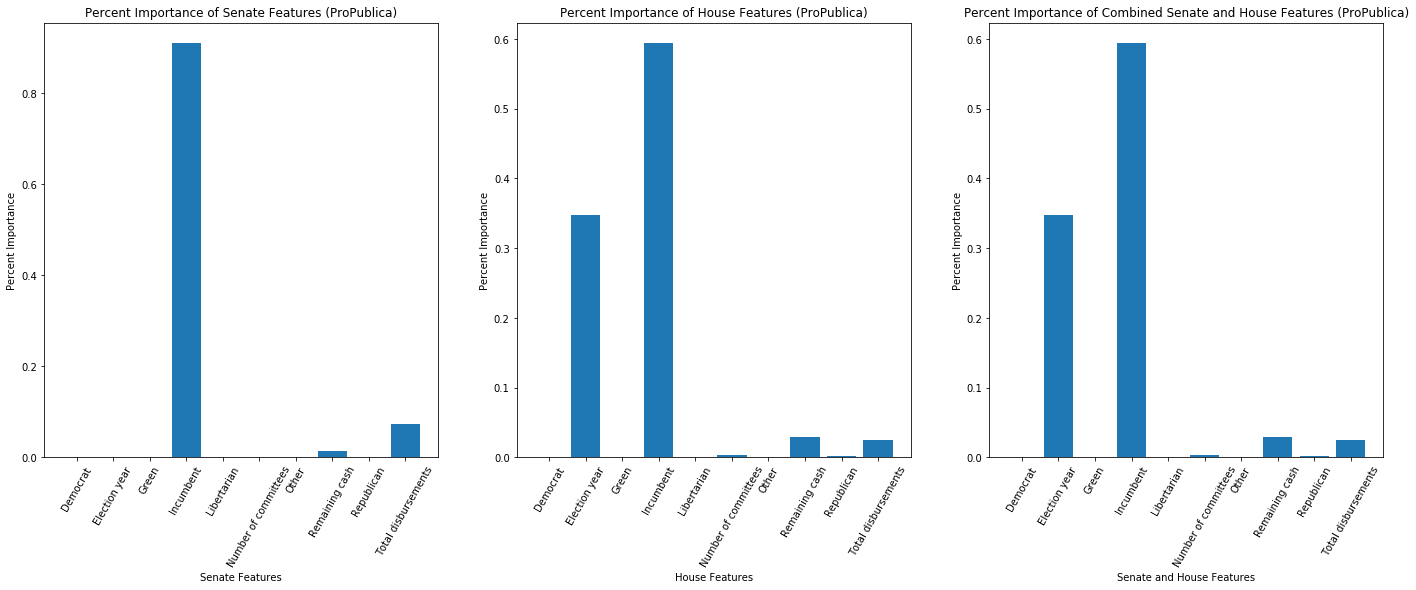

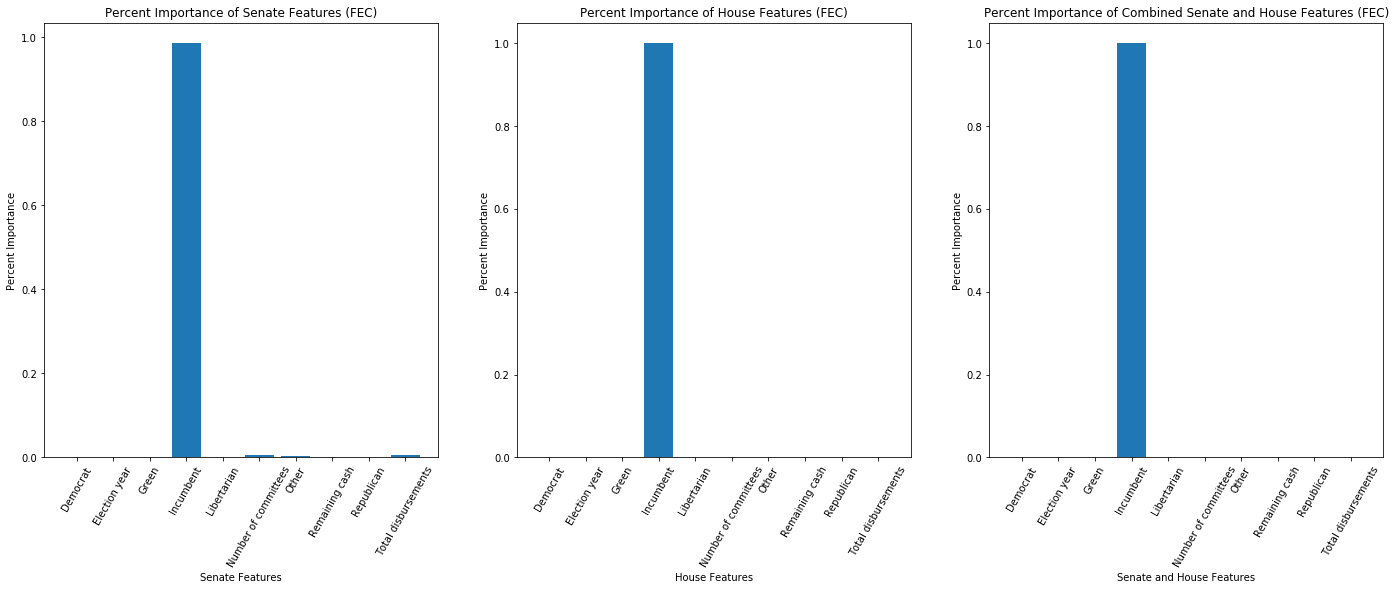

In [20]:
senate_propublica_importance_percent = senate_propublica_clf.feature_importances_
house_propublica_importance_percent = house_propublica_clf.feature_importances_
combined_propublica_importance_percent = combined_propublica_clf.feature_importances_

senate_fec_importance_percent = senate_fec_clf.feature_importances_
house_fec_importance_percent = house_fec_clf.feature_importances_
combined_fec_importance_percent = combined_fec_clf.feature_importances_

senate_feature_names = [name.replace('_', ' ').capitalize() for name in list(senate_X)]
house_feature_names = [name.replace('_', ' ').capitalize() for name in list(house_X)]
combined_feature_names = [name.replace('_', ' ').capitalize() for name in list(combined_X)]

plt.figure(figsize=(24, 8))

# ProPublica Target Data
plt.subplot(131)
plt.bar(senate_feature_names, senate_propublica_importance_percent)
plt.title('Percent Importance of Senate Features (ProPublica)')
plt.xlabel('Senate Features')
plt.ylabel('Percent Importance')

plt.xticks(rotation=60)

plt.subplot(132)
plt.title('Percent Importance of House Features (ProPublica)')
plt.xlabel('House Features')
plt.ylabel('Percent Importance')
plt.bar(house_feature_names, house_propublica_importance_percent)
plt.xticks(rotation=60)

plt.subplot(133)
plt.title('Percent Importance of Combined Senate and House Features (ProPublica)')
plt.xlabel('Senate and House Features')
plt.ylabel('Percent Importance')
plt.bar(house_feature_names, house_propublica_importance_percent)
plt.xticks(rotation=60)

plt.savefig(f'{project_root}/reports/propublica_data_feature_importance.png')
plt.show()

plt.figure(figsize=(24, 8))

# FEC Target Data
plt.subplot(131)
plt.bar(senate_feature_names, senate_fec_importance_percent)
plt.title('Percent Importance of Senate Features (FEC)')
plt.xlabel('Senate Features')
plt.ylabel('Percent Importance')
plt.xticks(rotation=60)

plt.subplot(132)
plt.title('Percent Importance of House Features (FEC)')
plt.xlabel('House Features')
plt.ylabel('Percent Importance')
plt.bar(house_feature_names, house_fec_importance_percent)
plt.xticks(rotation=60)

plt.subplot(133)
plt.title('Percent Importance of Combined Senate and House Features (FEC)')
plt.xlabel('Senate and House Features')
plt.ylabel('Percent Importance')
plt.bar(house_feature_names, house_fec_importance_percent)
plt.xticks(rotation=60)

plt.savefig(f'{project_root}/reports/fec_data_feature_importance.png')
plt.show()

In [23]:
import numpy as np

feature_importance_df = pd.DataFrame({
    'Senate (ProPublica)': senate_propublica_importance_percent,
    'Senate (FEC)': senate_fec_importance_percent,
    'House (ProPublica)': house_propublica_importance_percent,
    'House (FEC)': house_fec_importance_percent,
    'Combined (ProPublica)': combined_propublica_importance_percent,
    'Combined (FEC)': combined_fec_importance_percent
}, index=combined_feature_names).transpose()

feature_importance_df_mean = pd.DataFrame({ 'Mean': feature_importance_df.mean() }).transpose()
feature_importance_df_std = pd.DataFrame({ 'Standard Deviation': feature_importance_df.std() }).transpose()

# Generate summary dataframe and save to file
feature_importance_df_summary = feature_importance_df.append(feature_importance_df_mean).append(feature_importance_df_std)
feature_importance_df_summary.columns.name = 'Data set'
feature_importance_df_summary.to_csv(f'{project_root}/models/feature_importance_summary.csv', index_label='Data set')

feature_importance_df_summary

Data set               Democrat  Election year  Green  Incumbent  Libertarian  \
Combined (FEC)              0.0       0.000000    0.0   0.998387          0.0   
Combined (ProPublica)       0.0       0.314571    0.0   0.598242          0.0   
House (FEC)                 0.0       0.000018    0.0   0.999297          0.0   
House (ProPublica)          0.0       0.346951    0.0   0.593699          0.0   
Senate (FEC)                0.0       0.000000    0.0   0.986105          0.0   
Senate (ProPublica)         0.0       0.000000    0.0   0.910417          0.0   
Mean                        0.0       0.110257    0.0   0.847691          0.0   
Standard Deviation          0.0       0.171109    0.0   0.197749          0.0   

Data set               Number of committees     Other  Remaining cash  \
Combined (FEC)                     0.000400  0.000000        0.000414   
Combined (ProPublica)              0.005115  0.000000        0.040170   
House (FEC)                        0.000000  0.000000        0.000454   
House (ProPublica)                 0.003181  0.000000        0.029215   
Senate (FEC)                       0.005526  0.003757        0.000000   
Senate (ProPublica)                0.001874  0.000000        0.015065   
Mean                               0.002683  0.000626        0.014220   
Standard Deviation                 0.002337  0.001534        0.017212   

Data set               Republican  Total disbursements  
Combined (FEC)           0.000000             0.000799  
Combined (ProPublica)    0.000000             0.041902  
House (FEC)              0.000000             0.000231  
House (ProPublica)       0.002285             0.024669  
Senate (FEC)             0.000000             0.004611  
Senate (ProPublica)      0.000000             0.072644  
Mean                     0.000381             0.024143  
Standard Deviation       0.000933             0.028866

In [24]:
clf_scores = [
    senate_propublica_clf.score(senate_X_test, senate_propublica_y_test),
    senate_fec_clf.score(senate_X_test, senate_fec_y_test),
    house_propublica_clf.score(house_X_test, house_propublica_y_test),
    house_fec_clf.score(house_X_test, house_fec_y_test),
    combined_propublica_clf.score(combined_X_test, combined_propublica_y_test),
    combined_fec_clf.score(combined_X_test, combined_fec_y_test)
]

clf_names = [
    'Senate (ProPublica)',
    'Senate (FEC)',
    'House (ProPublica)',
    'House (FEC)',
    'Combined (ProPublica)',
    'Combined (FEC)'
]

# Generate score dataframe and save to file
clf_score_df = pd.DataFrame({ 'Score': clf_scores }, index=clf_names)
clf_score_df.columns.name = 'Data set'
clf_score_df.to_csv(f'{project_root}/models/classifier_scores.csv', index_label='Data set')

clf_score_df

Data set                  Score
Senate (ProPublica)    0.981818
Senate (FEC)           1.000000
House (ProPublica)     0.983677
House (FEC)            1.000000
Combined (ProPublica)  0.981214
Combined (FEC)         0.998555

## Results

From the data above, it is clear that whether or not a candidate is an incumbent in the election cycle is the single most important determinant of whether they will be victorious in a subsequent election.  While this result is not surprising in and of itself, the severity of the result is a bit unexpected.

## Discussion

### Data Issues
#### Issues with FEC Data
As mentioned earlier, there were issues with both the FEC API and the ProPublica API.  Because of [issues](https://github.com/fecgov/openFEC/issues/3076) with the accuracy of the FEC election data, I initially determined that I would not be able to use the FEC API to reliably determine if a candidate won an election.  The FEC often reported false negatives for well-known candidates, signifying that nobody won during a given election cycle.  Consequently, I decided to source the data from a different provider.  

#### Issues with ProPublica Data
I soon identified [ProPublica](https://www.propublica.org/) as a viable alternative data source.  ProPublica's [Congress API](https://projects.propublica.org/api-docs/congress-api/) offers a robust dataset on current and historical members of Congress, including various bits of public information about each.  Of particular interest was the FEC candidate IDs associated with each congress member.  I reasoned that I could use the ProPublica API to identify all years for which a Congress member, identified by his or her FEC candidate ID, held office.  Then, when pulling data from the FEC API, I could determine if a candidate won by identifying if the candidate held office the following year.

Unfortunately, I soon found that ProPublica's data was faulty too.  The ProPublica API's data for FEC candidate IDs only extend back through the last two terms of Congress.  Moreover, the candidates IDs from ProPublica are frequently incorrect.  A candidate running for election in a previously sought office reuses their FEC candidate ID from the prior election.  If they run for a different office, however, they will receive a different candidate ID to use for that office.  This means that if a member of the House of Representatives later runs to become a senator, he or she will receive a new candidate ID.  The designers of the ProPublica API seem unaware of this, however, and consequently will often list FEC candidate IDs for Congress members that are not associated with their office.

Lastly, after gathering the results, it became clear that the ProPublica victory data generated decision trees that believed a candidate's election year was incredibly significant to their election outcomes.  This is likely the result of incomplete candidate or election data from the 2018 congressional elections, and is not reflected in the dataset sourced exclusively from the SEC.  Given time, the 2018 election results should be reflected in the ProPublica data, thereby resulting in more accurate victory determinations.

#### Implications for Analysis
The combined faults of the FEC and ProPublica APIs mean that any attempt to generate data on victories from past congressional election cycles will contain spotty and incorrect information that may impact the results of any decision tree.

Cognizant of these limitations, I have only employed the 2016 and 2018 election cycles, since ProPublica was not reliable for elections from before this date.  I must also advise that the results only be taken with caution, given the obvious limitations of the underlying data.

### Overview
#### Classifier Options
When training the classifiers, I decided to allow a max depth of 10, and and a minimum of 5 samples at a given leaf.  These options were calibrated to prevent overfitting.  Since I had 10 features, I decided that a depth of 10 would hypothetically allow each feature to provide some deciding input.  This was rarely the case, however.  Features pertaining to political party, for example, had little impact on most tests.

I further restricted decision leafs by requiring a minimum of 5 samples per leaf.  Preliminary tests demonstrated that many complex decision trees were constructed with nodes involving only a single sample.  Since the datasets were relatively small, I tried to avoid making the minimum too restrictive.  5 samples seemed like a simple, liberal choice that was appropriate to the size of my dataset.

Lastly, I fixed the 'random_state' option at 1, to ensure idempotency in my reports.  While the results have been relatively constant each time I run the notebook, maintaining a constant result set is useful for reporting and analysis.

These options seem to have improved the accuracy of my dataset from the initial tests, wherein no options were specified.

#### Implications
The party affiliation had little perceivable impact on the general outcomes of each candidate.  Total disbursements and remaining cash did seem to have a notable impact on campaign outcomes - a result particularly notable using the ProPublica data.  Lastly, the number of committees involved in a campaign had a small but noticable impact on the predictive outcome.

Of the six classifier variants trained, those trained on the FEC data consistently scored higher, with the House campaign classifiers attaining "perfect" scores.  This likely reflects the limited size of the candidate datasets and the aforementioned inadequacies of the ProPublica API.

Evaluating the average across all datasets, whether or not a candidate was an incumbent accounted for roughly 84.769% of the decision made by the decision tree.  Presumably because of defective data, 11.026% of the decision was then made by evaluating the election year.  2.414% of the decision was then attributed to total disbursements, and 1.422% was attributed to the cash_remaining.

In conclusion, the data would seem to suggest that for congressional elections, campaign finance is a relevant but overemphasized factor in election outcomes.

Many of the decision trees generated are satisfied to decide the viability of a campaign simply based upon whether the candidate is an incumbent, only evaluating financial data upon determining that the candidate is, in fact, already in office.  This is exemplified in `reports/combined_fec_data_tree.png`, and again in `reports/house_fec_data_tree.png`, and again in `reports/senate_fec_data_tree.png`.

Perhaps this implies that a poorly funded reelection campaign offers more predictive value than a well-funded challenger campaign.  The implications of this behavioral pattern will be left for further research.

### Areas for Further Research
I would like to investigate the predictive value of campaign finance data without any interferance from non-financial information.  Some preliminary tests suggested that the number of committees associated with a campaign became more prominent when the "incumbent" feature was removed from the input dataset.  Such inquiries might help me better understand the implications of the previously discussed results.

I would also like to review these results work with cleaner data in the future.  The FEC is actively working to resolve the discrepancies in its own data.  When this is resolved, it will be feasible to revisit the conclusions of this research.